In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from celluloid import Camera

In [5]:
df = pd.read_table('data.csv', delimiter=';')
da = df.sort_values(by=['time'])

In [13]:
ids = df.id_politico.unique()

In [38]:
info = []
for id_politico in ids:
    info.append([id_politico,da.iloc[np.where(da.id_politico==id_politico)].set_index('time')['isFavorable']])

In [108]:
info[0][1]

time
2019-01-30 00:31:08    1
2019-03-21 11:02:32    1
2019-03-22 14:47:27    1
2019-03-22 15:14:29    1
2019-03-22 15:21:40    1
                      ..
2019-07-10 18:17:06    1
2019-07-10 20:52:01    1
2019-07-10 22:32:21    1
2019-07-10 23:26:46    1
2019-07-11 14:05:13    1
Name: isFavorable, Length: 80, dtype: int64

In [94]:
P = []
p1 = []
p0 = []
p_1 = []

p_11 = []
p1_1 = []
p01 = []
p0_1 = []

for i in range(len(info)):
    id_politico = info[i][0]
    serie = info[i][1]
    if len(serie)==1:
        continue
    #for j in range(len(serie)):

    #manter a posicao
    
    P.append([id_politico,[serie[k] for k in range(1,len(serie)) if serie[k-1]==serie[k]],serie])
    p1.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==serie[k] and serie[k-1]==1)],[x for x in serie if x==1]])
    p0.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==serie[k] and serie[k-1]==0)],[x for x in serie if x==0]])
    p_1.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==serie[k] and serie[k-1]==-1)],[x for x in serie if x==-1]])
    
    # transicoes
    
    p_11.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==-1 and serie[k-1]==1)],serie])
    p1_1.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==1 and serie[k-1]==-1)],serie])
    p01.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==0 and serie[k-1]==1)],serie])
    p0_1.append([id_politico,[serie[k] for k in range(1,len(serie)) if (serie[k-1]==0 and serie[k-1]==-1)],serie])
    

In [118]:
def tryD(x,y):
    try:
        return x/y
    except:
        return 0

In [169]:
info_s = [[x[0],score(x[1])] for x in P if len(score(x[1]))>0]

In [170]:
delta = .25

In [ ]:
Omega = []
Lambda = []
K = []

for i in range(1,len(info_s)):
    O = [x for x in info if abs(score(x[1][:i])[-1])<=-delta]
    L = [x for x in info if abs(score(x[1][:i])[-1])>=+delta]
    k = [x for x in info if abs(score(x[1][:i])[-1])<=delta]
    
    Omega.append(O)
    Lambda.append(L)
    K.append(k)

In [ ]:
Omega

In [132]:
i=1

In [139]:
score(info[0][1][:i])[-1]<=-delta

False

In [103]:
df_prob = pd.DataFrame([len(x[1])/len(x[2]) for x in P])

df_prob1 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p1])
df_prob0 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p0])
df_prob_1 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p_1])

df_prob1.columns = ['Prob de se manter no 1']
df_prob0.columns = ['Prob de se manter no 0']
df_prob_1.columns = ['Prob de se manter no -1']

df_prob_11 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p_11])
df_prob1_1 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p1_1])
df_prob01 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p01])
df_prob0_1 = pd.DataFrame([tryD(len(x[1]),len(x[2])) for x in p0_1])


0    0.696796
dtype: float64


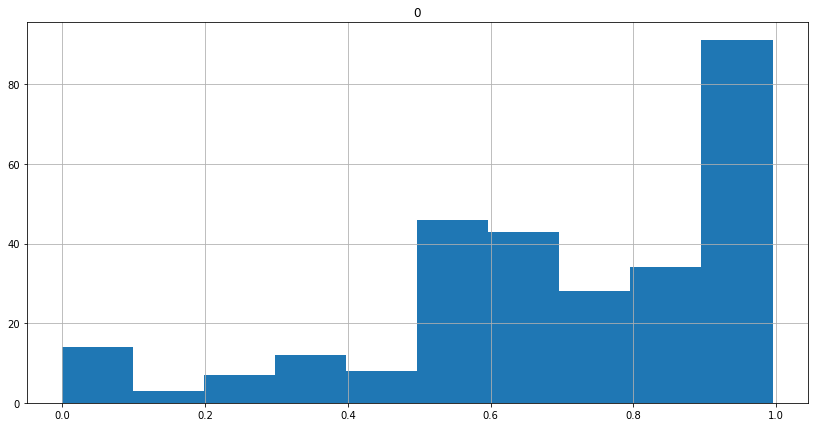

In [104]:
df_prob.hist(figsize=(14,7),grid=True)
print(df_prob.mean())

Prob de se manter no 1    0.375341
dtype: float64


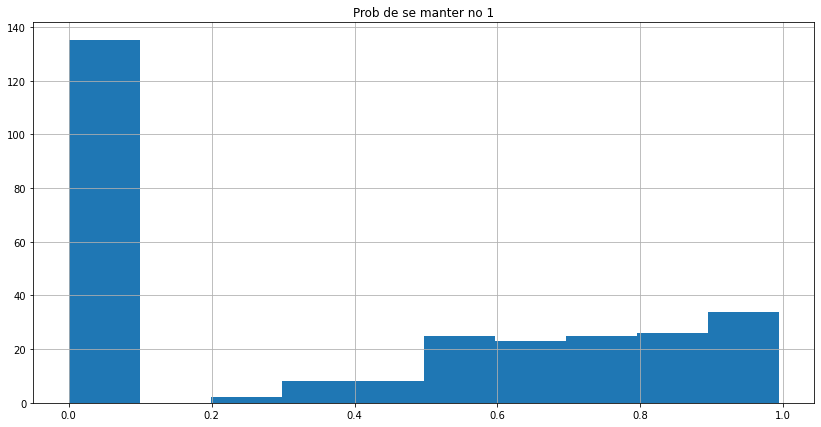

In [105]:
df_prob1.hist(figsize=(14,7),grid=True)
print(df_prob1.mean())

Prob de se manter no 0    0.273641
dtype: float64


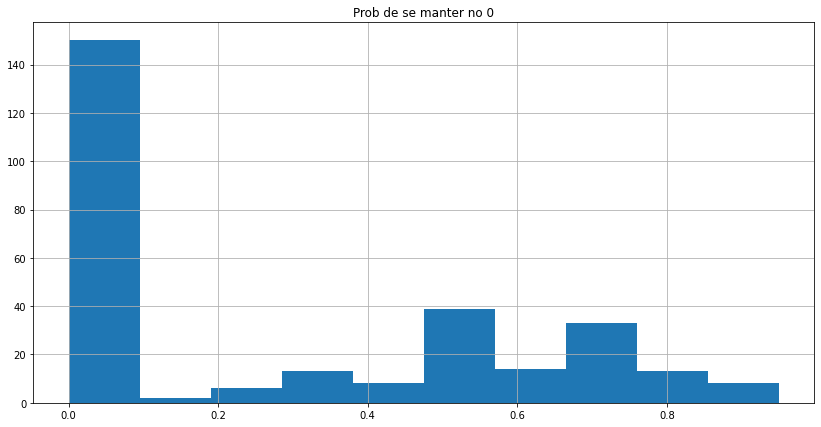

In [106]:
df_prob0.hist(figsize=(14,7),grid=True)
print(df_prob0.mean())

Prob de se manter no -1    0.303332
dtype: float64


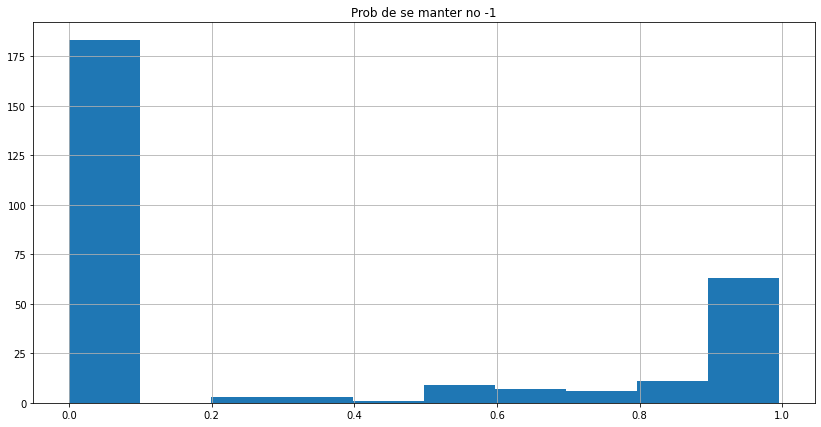

In [107]:
df_prob_1.hist(figsize=(14,7),grid=True)
print(df_prob_1.mean())

0    0.0
dtype: float64


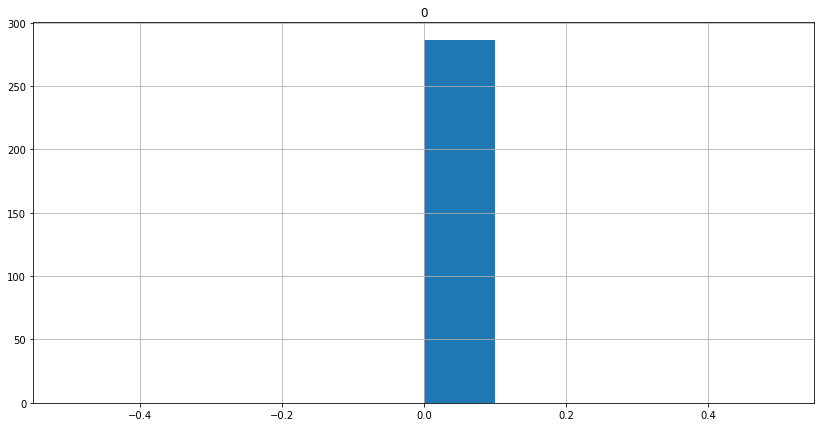

In [88]:
df_prob1_1.hist(figsize=(14,7),grid=True)
print(df_prob1_1.mean())

0    0.0
dtype: float64


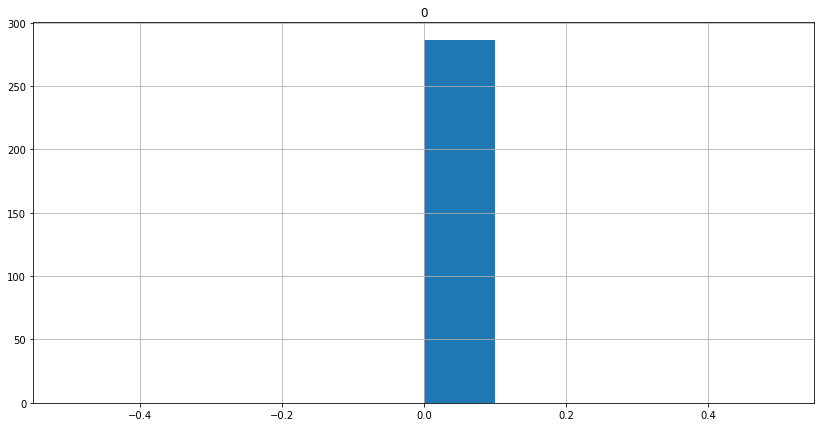

In [87]:
df_prob_11.hist(figsize=(14,7),grid=True)
print(df_prob_11.mean())

0    0.0
dtype: float64


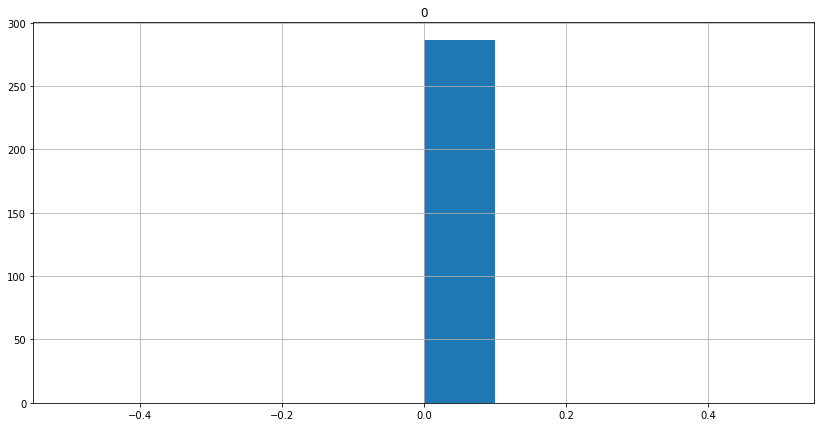

In [86]:
df_prob0_1.hist(figsize=(14,7),grid=True)
print(df_prob0_1.mean())

0    0.0
dtype: float64


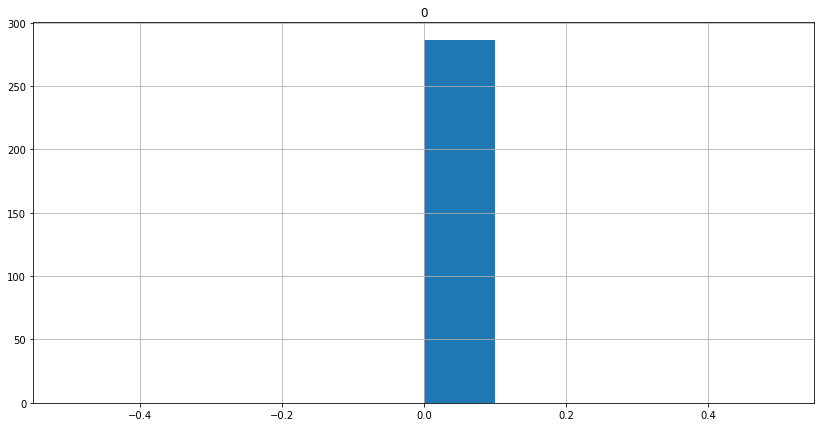

In [85]:
df_prob01.hist(figsize=(14,7),grid=True)
print(df_prob01.mean())

In [121]:
def score(vec,Lambda=.96):
    try:
        r = [vec[0]]
        for i in range(1,len(vec)):
            r.append(r[-1]*(Lambda)+vec[i]*(1-Lambda))
        return r
    except:
        return []

In [116]:
[score(x[1])[-1] for x in info]

[1.0,
 -1.0,
 -0.9985355625556553,
 0.685174966469315,
 -0.9754164227715898,
 0.822757789696,
 -1.0,
 1.0,
 -1.0,
 -0.12302644252581396,
 0.96,
 -0.8011448603858211,
 -1.0,
 0.3051094648841728,
 -1.0,
 0.2402104210161666,
 -1.0,
 -1.0,
 -0.9827020211734705,
 0.3029414529166345,
 0.898021789696,
 -0.9712627601843222,
 -0.9995530876691631,
 0.07840000000000007,
 -0.6501015710190419,
 0.10622730240000008,
 0.0,
 0.49777710367673034,
 0,
 0.9660261376,
 0.9936281509594642,
 0.9445511114009866,
 -1.0,
 -0.9997715751519543,
 0.0,
 -1.0,
 0.855011229696,
 0.96461056,
 0.9668692269026555,
 -1.0,
 0.7936027152777528,
 0.9990645653970985,
 0.6805297239930279,
 0.18185277030400016,
 0.9616,
 -0.976471945318537,
 0.967385092096,
 0.7137684417363607,
 -0.040000000000000036,
 0.9216,
 0.004249092096000006,
 0.9616,
 0.0,
 -1.0,
 0.15065344000000014,
 0.4420024338794074,
 0.9867143354297458,
 0.782757789696,
 -1.0,
 -0.997803939760353,
 0.040000000000000036,
 0.7654609805996802,
 -0.9216,
 0.94912598

In [50]:
serie

time
2019-07-10 23:59:21    1
Name: isFavorable, dtype: int64

In [51]:
info[i-2]

[263,
 time
 2019-07-10 23:31:58    1
 Name: isFavorable, dtype: int64]

In [54]:
[serie[k] for k in range(1,len(serie)) if serie[k-1]==serie[k]]

[]

In [17]:
from platform import python_version

print(python_version())

3.9.0


In [18]:
import sys

print(sys.path)

['/Users/heitorbuenoponchioxavier/Documents/PythonScripts', '/usr/local/Cellar/python@3.9/3.9.0_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.0_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.0_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages', '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/IPython/extensions', '/Users/heitorbuenoponchioxavier/.ipython']


In [4]:
!pip3 install pandas numpy